# Third order Langevin dynamics parameter $\mu_{ij}$ and $\sigma_{ij}$ computations  

The formula used in this calculation can be found in [this article](https://www.jmlr.org/papers/volume22/20-576/20-576.pdf)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

\begin{aligned}
\mu_{12} &= \left( 1 + \frac{\gamma^2}{\xi^2} \right)\eta - \frac{\gamma^2}{2\xi} \eta^2 - \frac{\gamma^2}{\xi^3}(1 - e^{-\xi\eta}) 
\end{aligned}

In [2]:
def mu12(gamma, eta, xi):
    val = (
        (1 + gamma**2 / xi**2) * eta
        - (gamma**2 / (2 * xi)) * eta**2
        - (gamma**2 / xi**3) * (1 - np.exp(-xi * eta))
    )
    return val

\begin{aligned}
\mu_{13} &= \frac{\gamma}{\xi} \eta + \frac{\gamma}{\xi^2} \left( e^{-\xi\eta} - 1 \right) \\
\end{aligned}

In [3]:
def mu13(gamma, eta, xi):
    val = (
        (gamma / xi) * eta
        + (gamma / xi**2) * (np.exp(-xi * eta) - 1)
    )
    return val

\begin{aligned}
\mu_{22} &= 1 + \frac{\gamma^2}{\xi^2} \left( 1 - \xi \eta - e^{-\xi\eta} \right) \\
\end{aligned}

In [4]:
def mu22(gamma, eta, xi):
    val = (
        1 + (gamma**2 / xi**2) * (1 - xi * eta - np.exp(-xi * eta))
    )
    return val

\begin{aligned}
\mu_{23} &= \frac{\gamma}{\xi} \left( 1 - e^{-\xi\eta} \right)
\end{aligned}

In [5]:
def mu23(gamma, eta, xi):
    val = (
        (gamma / xi) * (1 - np.exp(-xi * eta))
    )
    return val

\begin{aligned}
\mu_{31} &= \frac{\gamma}{\xi} - \frac{\gamma}{\xi^2} \cdot \frac{1 - e^{-\xi\eta}}{\eta}
\end{aligned}

In [6]:
def mu31(gamma, eta, xi):
    val = (
        (gamma / xi)
        - (gamma / xi**2) * ((1 - np.exp(-xi * eta)) / eta)
    )
    return val

\begin{aligned}
\mu_{32} &= \frac{\gamma^3}{\xi^2} \eta + \frac{\gamma^3}{\xi^2} \eta e^{-\xi\eta} - \left( \frac{2\gamma^3}{\xi^3} + \frac{\gamma}{\xi} \right)(1 - e^{-\xi\eta})
\end{aligned}

In [7]:
def mu32(gamma, eta, xi):
    val = (
        (gamma**3 / xi**2) * eta
        + (gamma**3 / xi**2) * eta * np.exp(-xi * eta)
        - (2 * gamma**3 / xi**3 + gamma / xi) * (1 - np.exp(-xi * eta))
    )
    return val

\begin{aligned}
\mu_{33} &= e^{-\xi\eta} + \frac{\gamma^2}{\xi} \eta e^{-\xi\eta} - \frac{\gamma^2}{\xi^2}(1 - e^{-\xi\eta})
\end{aligned}

In [8]:
def mu33(gamma, eta, xi):
    val = (
        np.exp(-xi * eta)
        + (gamma**2 / xi) * eta * np.exp(-xi * eta)
        - (gamma**2 / xi**2) * (1 - np.exp(-xi * eta))
    )
    return val

In [9]:
def sigma11(gamma, eta, xi):
    exp1 = np.exp(-eta*xi)
    exp2 = np.exp(-2*eta*xi)
    val = (
        (2 * np.power(gamma, 2) * eta) / np.power(xi, 3)
        - (2 * np.power(gamma, 2) * np.power(eta, 2)) / np.power(xi, 2)
        + (2 * np.power(gamma, 2) * np.power(eta, 3)) / (3 * xi)
        - (4 * np.power(gamma, 2) * eta * exp1) / np.power(xi, 3)
        + (np.power(gamma, 2) * (1 - exp2)) / np.power(xi, 4)
    )
    return val

In [10]:
def sigma12(gamma, eta, xi):
    exp1 = np.exp(-eta*xi)
    val = (
        (np.power(gamma, 2) * np.power((xi * eta - (1 - exp1)), 2))/ np.power(xi, 3)
    )
    return val

In [11]:
def sigma22(gamma, eta, xi):
    exp1 = np.exp(-eta*xi)
    exp2 = np.exp(-2*eta*xi)
    val = (
        (2 * np.power(gamma, 2) * eta) / xi
        - (4 * np.power(gamma, 2) * (1 - exp1)) / np.power(xi, 2)
        + (np.power(gamma, 2) * (1 - exp2)) / np.power(xi, 2)
    )
    return val

In [12]:
def sigma13(gamma, eta, xi):
    exp1 = np.exp(-eta*xi)
    exp2 = np.exp(-2*eta*xi)
    val = (
        - (np.power(gamma, 3) * np.power(eta, 2) * (2*exp1 + 1)) / np.power(xi, 2)
        + eta * (
            (2 * np.power(gamma, 3)) / np.power(xi, 3)
            - (np.power(gamma, 3) * exp2) / np.power(xi, 3)
            - (4 * np.power(gamma, 3) * exp1) / np.power(xi, 3)
            - (2 * gamma * exp1) / xi
        )
        + (
            ((3 * np.power(gamma, 3)) / (2 * np.power(xi, 4)))
            + gamma / np.power(xi, 2)
        ) * (1 - exp2)
    )
    return val

In [13]:
def sigma23(gamma, eta, xi):
    exp1 = np.exp(-eta*xi)
    exp2 = np.exp(-2*eta*xi)
    val = (
        (np.power(gamma, 3) * (exp2 - 2 * exp1 - 2) * eta) / np.power(xi, 2)
        + (3 * np.power(gamma, 3) * (exp2 - 4 * exp1 + 3)) / (2 * np.power(xi, 3))
        + (gamma * np.power((1 - exp1), 2)) / xi
    )
    return val

In [14]:
def sigma33(gamma, eta, xi):
    exp1 = np.exp(-eta*xi)
    exp2 = np.exp(-2*eta*xi)
    val = (
        - (np.power(gamma, 4) * np.power(eta, 2) * exp2) / np.power(xi, 2)
        + eta * (
            - (2 * np.power(gamma, 2) * exp2) / xi
            + (np.power(gamma, 4) * (-3 * exp2 + 4 * exp1 +2)) / np.power(xi, 3)
        )
        + (np.power(gamma, 4) * (-5 * exp2 + 16 * exp1 - 11)) / (2 * np.power(xi, 4))
        + ((np.power(gamma, 2) * (-3 * exp2 + 4 * exp1 - 1)) / np.power(xi, 2))
        + (1 - exp2)
    )
    return val

In [15]:
def sigma(x, y, z):
    mat = np.array([
        [sigma11(x,y,z), sigma12(x,y,z), sigma13(x,y,z)],
        [sigma12(x,y,z), sigma22(x,y,z), sigma23(x,y,z)],
        [sigma13(x,y,z), sigma23(x,y,z), sigma33(x,y,z)],
    ])
    return mat

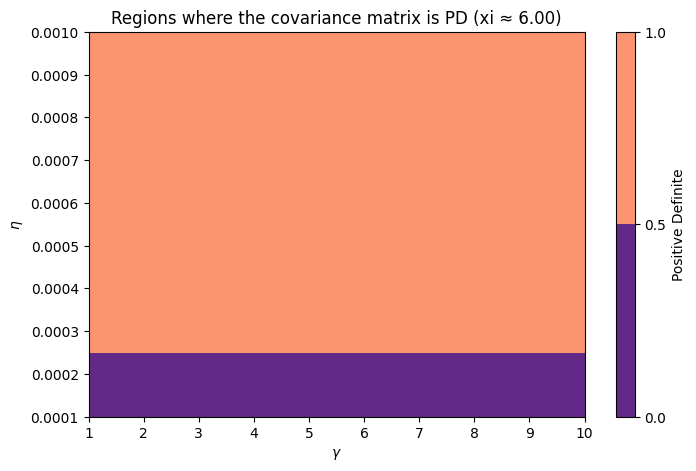

In [18]:
# Grid setup
gamma_val = np.linspace(1, 10,10)
eta_val = np.linspace(0.0001, 0.001,10)
xi_val = np.linspace(1, 10,10)

# 3D meshgrid
GAMMA, ETA, XI = np.meshgrid(gamma_val, eta_val, xi_val, indexing='ij')  

pd = np.zeros(GAMMA.shape, dtype=bool)

# Iterate through 3D grid
for i in range(GAMMA.shape[0]):
    for j in range(GAMMA.shape[1]):
        for k in range(GAMMA.shape[2]):
            gamma = GAMMA[i, j, k]
            eta = ETA[i, j, k]
            xi = XI[i, j, k]
            mat = sigma(gamma, eta, xi)

            if np.isfinite(mat).all():
                eigvalues = np.linalg.eigvals(mat)
                if np.all(eigvalues > 0):
                    pd[i, j, k] = True

# Plot slice at a fixed xi index (e.g., middle slice)
xi_index = len(xi_val) // 2

plt.figure(figsize=(8, 5))
plt.contourf(
    GAMMA[:, :, xi_index],
    ETA[:, :, xi_index], 
    pd[:, :, xi_index], 
    levels=1, 
    cmap='magma', 
    alpha=0.9
)
plt.colorbar(label='Positive Definite')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\eta$')
plt.title(f'Regions where the covariance matrix is PD (xi ≈ {xi_val[xi_index]:.2f})')
plt.show()